# 3.2 텐서플로의 텐서 연산

[https://datascienceschool.net/view-notebook/55ca1c4c0213445d92ee5a5f297c709f/](https://datascienceschool.net/view-notebook/55ca1c4c0213445d92ee5a5f297c709f/)

In [1]:
# 코랩에서는 다음 코드로 베타버전을 설치
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 38kB/s 
     |████████████████████████████████| 4.3MB 38.5MB/s 
     |████████████████████████████████| 501kB 60.9MB/s 


In [2]:
import tensorflow as tf
tf.__version__

'2.0.0-rc0'

Tensor 자료형의 연산은 TensorFlow가 제공하는 연산자를 사용해야 한다. 이 연산자의 이름은 NumPy가 SciPy에서 제공하는 연산자와 다르므로 별도로 외워야 한다.

<br>

## 기본 연산

다음과 같은 기본 연산은 특수 메서드를 이용하여 연산자 오버로딩이 되어 있으므로 그냥 연산자 기호를 사용해도 된다.

- `tf.add` : 덧셈
- `tf.substract` : 뺄셈
- `tf.multiply` : 곱셈
- `tf.divide` : 나눗셈
- `tf.pow` : n-제곱
- `tf.negative` : 음수 부호

In [3]:
a = tf.range(6, dtype=tf.int32)    # [0, 1, 2, 3, 4, 5]
b = 2 * tf.ones(6, dtype=tf.int32) # [2, 2, 2, 2, 2, 2]

tf.add(a, b).numpy()

array([2, 3, 4, 5, 6, 7], dtype=int32)

In [4]:
(a + b).numpy()

array([2, 3, 4, 5, 6, 7], dtype=int32)

In [5]:
(a - b).numpy()

array([-2, -1,  0,  1,  2,  3], dtype=int32)

In [6]:
(a * b).numpy()

array([ 0,  2,  4,  6,  8, 10], dtype=int32)

In [7]:
(a / b).numpy()

array([0. , 0.5, 1. , 1.5, 2. , 2.5])

In [8]:
(a ** 2).numpy()

array([ 0,  1,  4,  9, 16, 25], dtype=int32)

In [9]:
(-b).numpy()

array([-2, -2, -2, -2, -2, -2], dtype=int32)

연산자 오버로딩이 불가능한 연산은 사용할 때 주의한다.

- `tf.abs` : 절대값
- `tf.sign` : 부호
- `tf.round` : 반올림
- `tf.ceil` : 올림
- `tf.floor` : 내림
- `tf.square` : 제곱
- `tf.sqrt` : 제곱근
- `tf.maximum` : 두 텐서의 각 원소에서 최댓값만 반환
- `tf.minimum` : 두 텐서의 각 원소에서 최솟값만 반환
- `tf.cumsum` : 누적합
- `tf.cumprod` : 누적곱

In [10]:
tf.maximum(a, b).numpy()

array([2, 2, 2, 3, 4, 5], dtype=int32)

벡터나 행렬의 원소들을 연산하여 스칼라 값을 구하는 차원 축소 연산은 `tf.reduce_` 명령을 사용한다.

- `tf.reduce_all` : 설정한 축으로 이동하면서 `and` 논리 연산을 수행한다.
- `tf.reduce_any` : 설정한 축으로 이동하면서 `or` 논리 연산을 수행한다.
- `tf.reduce_mean` : 설정한 축의 평균을 구한다.
- `tf.reduce_max` : 설정한 축의 최댓값을 구한다.
- `tf.reduce_min` : 설정한 축의 최솟값을 구한다.
- `tf.reduce_prod` : 설정한 축의 요소를 모두 곱한 값을 구한다.
- `tf.reduce_sum` : 설정한 축의 요소를 모두 더한 값을 구한다.
- `tf.reduce_logsumexp` : 설정한 축의 벡터가 $N$ 차원의 벡터 $x$라고 할 때,

$$
log \left( \sum_{i=0}^{N} exp \; x_i \right)
$$

In [11]:
a.numpy()

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [12]:
tf.reduce_sum(a).numpy()

15

<br>

## 자동 형변환

TensorFlow 연산자에 NumPy 배열이 들어가면 자동으로 상수 텐서 자료형으로 형변환(coercion)되어 연산이 이루어진다.

In [0]:
import numpy as np

In [16]:
a = np.ones((2, 3), dtype=np.float32)
b = tf.ones([3, 1], dtype=tf.float32)
tf.matmul(a, b).numpy()

array([[3.],
       [3.]], dtype=float32)

<br>

## 행렬 연산

또한 행렬과 관련된 연산에서도 NumPy와는 이름이 다르므로 주의한다.

- `tf.matmul` : 내적
- `tf.linalg.inv` : 역행렬

In [17]:
a = tf.constant([[2, 0], [0, 1]], dtype=tf.float32)
b = tf.constant([[1, 1], [1, 1]], dtype=tf.float32)

tf.matmul(a, b).numpy()

array([[2., 2.],
       [1., 1.]], dtype=float32)

In [18]:
a = tf.constant([[2, 0], [0, 1]], dtype=tf.float32)

tf.linalg.inv(a).numpy()

array([[0.5, 0. ],
       [0. , 1. ]], dtype=float32)

<br>

## 신경망 함수

nn 서브패키지에는 신경망에서 쓰이는 함수들도 구현되어 있다.

- `tf.nn.sigmoid` : 로지스틱 함수
- `tf.nn.softplus` : 소프트플러스 함수
- `tf.nn.softsign` : 소프트사인 함수

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

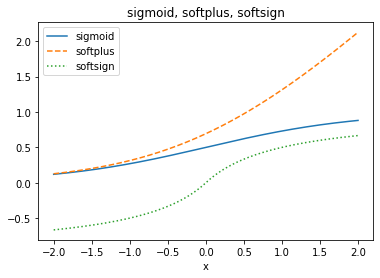

In [24]:
x = tf.linspace(-2.0, 2, 1000)

y1 = tf.nn.sigmoid(x)
y2 = tf.nn.softplus(x)
y3 = tf.nn.softsign(x)

plt.plot(x, y1, "-", label="sigmoid")
plt.plot(x, y2, "--", label="softplus")
plt.plot(x, y3, ":", label="softsign")

plt.xlabel("x")
plt.title("sigmoid, softplus, softsign")
plt.legend()

plt.show()

<br>

In [0]:
## 선형회귀 모형

In [26]:
w0 = tf.constant([[3.0], [5.0]])
w0.numpy()

array([[3.],
       [5.]], dtype=float32)

In [27]:
X = tf.concat([tf.ones((10, 1)), tf.random.normal((10, 1))], 1)
X.numpy()

array([[ 1.        ,  0.05203318],
       [ 1.        , -0.7616247 ],
       [ 1.        ,  1.2245837 ],
       [ 1.        , -0.10380754],
       [ 1.        ,  0.16221952],
       [ 1.        ,  1.4811908 ],
       [ 1.        , -0.31074896],
       [ 1.        , -1.3848566 ],
       [ 1.        ,  0.0079447 ],
       [ 1.        , -0.8710239 ]], dtype=float32)

In [28]:
y_target = tf.matmul(X, w0) + tf.random.normal((10, 1))
y_target.numpy()

array([[ 1.0441158 ],
       [ 0.09185427],
       [ 8.061887  ],
       [ 2.0212145 ],
       [ 3.818164  ],
       [11.277469  ],
       [ 0.11172926],
       [-5.0271306 ],
       [ 3.4719872 ],
       [-0.36132348]], dtype=float32)

In [29]:
w = tf.constant([[0.0], [0.0]])
y_predict = tf.matmul(X, w)
y_predict.numpy()

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

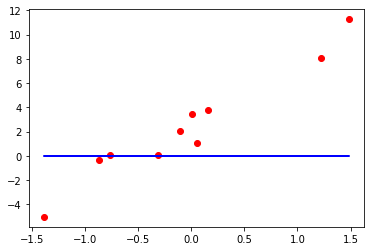

In [32]:
plt.plot(X[:, 1], y_target, "ro")
plt.plot(X[:, 1], y_predict, "b-")
plt.show()

In [33]:
loss = tf.reduce_sum(tf.square(y_target - y_predict))
loss.numpy()

249.40738

In [34]:
w = tf.constant([[3.0], [3.0]])
y_predict = tf.matmul(X, w)
y_predict.numpy()

array([[ 3.1560996 ],
       [ 0.71512604],
       [ 6.6737514 ],
       [ 2.6885774 ],
       [ 3.4866586 ],
       [ 7.4435725 ],
       [ 2.067753  ],
       [-1.1545696 ],
       [ 3.023834  ],
       [ 0.38692832]], dtype=float32)

In [35]:
loss = tf.reduce_sum(tf.square(y_target - y_predict))
loss.numpy()

41.613377

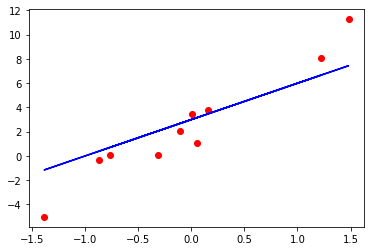

In [36]:
plt.plot(X[:, 1], y_target, "ro")
plt.plot(X[:, 1], y_predict, "b-")
plt.show()